## 1. Contexto del análisis

## 2. El set de datos
La informacion recolectada se encuantra en un archivo CSV (vic_elec_125256) con 54688 filas y 5 columnas

In [3]:
# 3. Primera mirada al dataset
# Importamos librerias/modulos para EDA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Importar el script de python
#import scripts.miapp as miapp

In [4]:
# Leyendo el CSV
ruta = "../src/data/vic_elec_125256.csv"
data = pd.read_csv(ruta)

In [5]:
# Mostrar el dataset
print(data.shape)
data.head()

(52608, 5)


,Time,Demand,Temperature,Date,Holiday
0,2011-12-31T13:00:00Z,4382.825174,21.40,2012-01-01,True
1,2011-12-31T13:30:00Z,4263.365526,21.05,2012-01-01,True
2,2011-12-31T14:00:00Z,4048.966046,20.70,2012-01-01,True
3,2011-12-31T14:30:00Z,3877.563330,20.55,2012-01-01,True
4,2011-12-31T15:00:00Z,4036.229746,20.40,2012-01-01,True


In [6]:
# Veamos las varialbes categoricas y las numericas
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52608 entries, 0 to 52607
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Time         52608 non-null  object 
 1   Demand       52608 non-null  float64
 2   Temperature  52608 non-null  float64
 3   Date         52608 non-null  object 
 4   Holiday      52608 non-null  bool   
dtypes: bool(1), float64(2), object(2)
memory usage: 1.7+ MB


## 4. Limpieza del dataset
Se realizara el proceso de limpieza teniendo encuanta las situaciones comunes:
1. Datos faltantes en algunas celdas.
2. Columnas irrelevantes (ques no corresponden al problema que queremos resolver)
3. Registros (filas) repetidos.
4. Valores extremos (outliers) en el caso de las variables numericas. Se deben
analizar en detalle pues no necesariamente la soulucion es eliminarlos.
5. Errore tipograficos en el caso de las variabe categoriccas.

Se supone que, al final de este proceso de limpieza deberiamos tener un set de datos
integro, listo para la fase de Análisis Exploratorio.

## 4.1 Datos faltantes
Aca comenzaremos viendo los datos que no esten comletos,
pues no todas las columnas tienen la misma cantidad de registros.
El numero totoal de registrs deberia ser 54,688.

## 4.2 Columnas irrelevantes
Una columnas irrelenvante contiene:
1. No contienen informcion relevante para el problema que queremos resolver.
2. Una columnas categoria pero con un solo nivel.
3. Una columna numerica pero con un solo valor.
4. Columnas con informacion redundante.

Pero si se tiene dudas sobre una columnas puede ser relevante o no, lo mejor es dejarla,
y mas adelante en las sigueintes etapas, podremos darnos cuenta de si se preserva o no.

Todas las columnas categoricas, tiene mas de un subnivel.
Lo cual no se elemina ninguna.

In [7]:
# Veamos que ocurren con las columnas numericas
data.describe()

,Demand,Temperature
count,52608.000000,52608.000000
mean,4665.432826,16.265071
std,874.273645,5.658849
min,2857.945728,1.500000
25%,3969.464472,12.300000
50%,4634.706032,15.400000
75%,5244.325424,19.400000
max,9345.004346,43.200000


Como se muestra, solo hay dos columnas que tienen desviaciones estandar (std)
diferentes de cero, lo que indica que no tiene un unico valor.

In [8]:
# 4.3 Filas repetidas
print(f'Volumen del dataset antes de eliminar filas repetidas: {data.shape}')
data.drop_duplicates(inplace=True)
print(f'Volumen del dataset despues de eliminar filas repetidas: {data.shape}')

Volumen del dataset antes de eliminar filas repetidas: (52608, 5)
Volumen del dataset despues de eliminar filas repetidas: (52608, 5)


## 4.4 Outliers (valres extremos) en las variable numericas
No siempre se eliminan los Outliers porque dependiendo de la variable numerica
analizada, estos pueden contener informacion importante.

Crearemos graficas tipo "boxplot" de las columnas numericas:

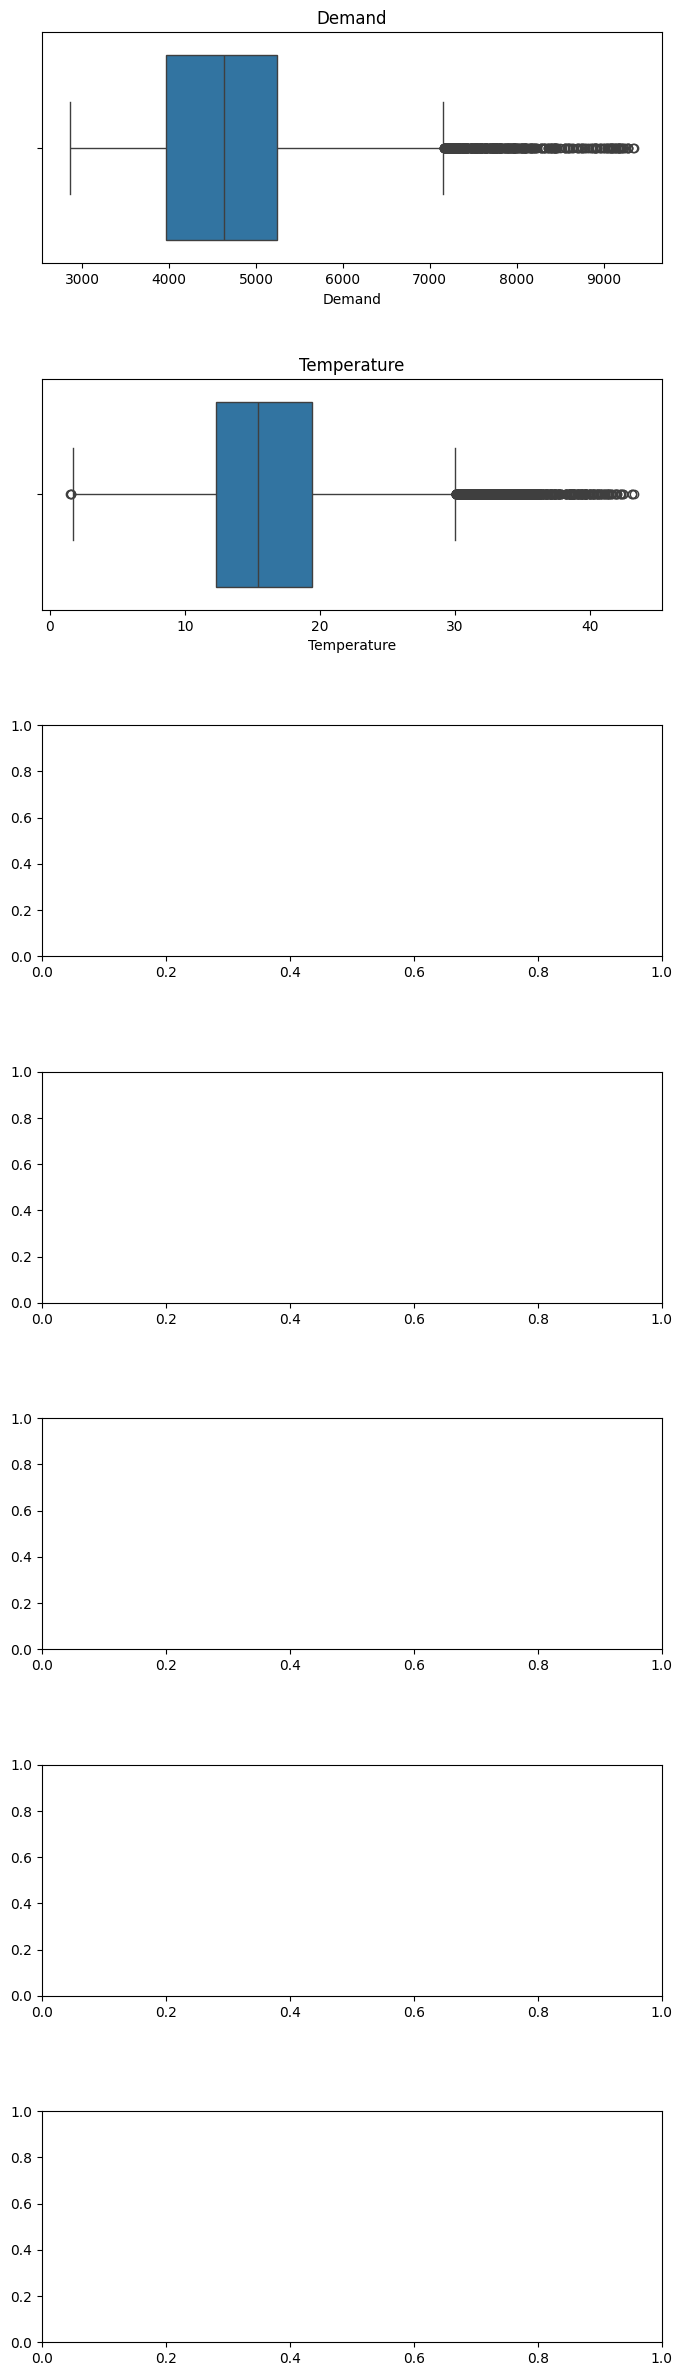

In [9]:
# Generarndo graficos individuales pues las varaible numericas
# estan en rangos diferentes

columnas_numericas = ['Demand', 'Temperature']

fig, ax = plt.subplots(nrows=7, ncols=1, figsize=(8, 30))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(columnas_numericas):
    sns.boxplot(x=col, data=data, ax=ax[i])
    ax[i].set_title(col)

Observaciones:
1. "Demand": hay valores con extremos a los 7000
2. "Temperature": hay valores con extremos a los 30

In [10]:
# Eliminar filas con "Demand" > 7000
print(f'Eliminando filas de Demand: \nVolumen del dataset antes de elimnar regristros de Demand: {data.shape}')
data = data[data['Demand'] >= 7000]
print(f'Volumen del dataset despues de elimnar regristros de Demand: {data.shape}\n')

# Eliminar filas con "Temperature" >30
print(f'Eliminando filas de Temperature: \nVolumen del dataset antes de elimnar regristros de Temperature: {data.shape}')
data = data[data['Temperature'] >= 25]
print(f'Volumen del dataset despues de elimnar regristros de Temperature: {data.shape}\n')

Eliminando filas de Demand: 
Volumen del dataset antes de elimnar regristros de Demand: (52608, 5)
Volumen del dataset despues de elimnar regristros de Demand: (518, 5)

Eliminando filas de Temperature: 
Volumen del dataset antes de elimnar regristros de Temperature: (518, 5)
Volumen del dataset despues de elimnar regristros de Temperature: (515, 5)



## 4.5 Errores tipograficos en variable categoricas
En una variable categorica pueden aparecer subniveles como abreviatures
y palabras compretas, por ejemplo, "pag" y "paginas", lo cual para nosotros
son equivalentes, pero que a nuestro programa parerian diferentes.

Estos sub-niveles, deberian unificarse. Para este caso las caregorias, son unicas,
por lo cual no hay que unificarlos

C:\Users\josetorres\AppData\Local\Temp\ipykernel_17704\2139796334.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=90)
C:\Users\josetorres\AppData\Local\Temp\ipykernel_17704\2139796334.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=90)
C:\Users\josetorres\AppData\Local\Temp\ipykernel_17704\2139796334.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=90)
C:\Users\josetorres\AppData\Local\Temp\ipykernel_17704\2139796334.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].se

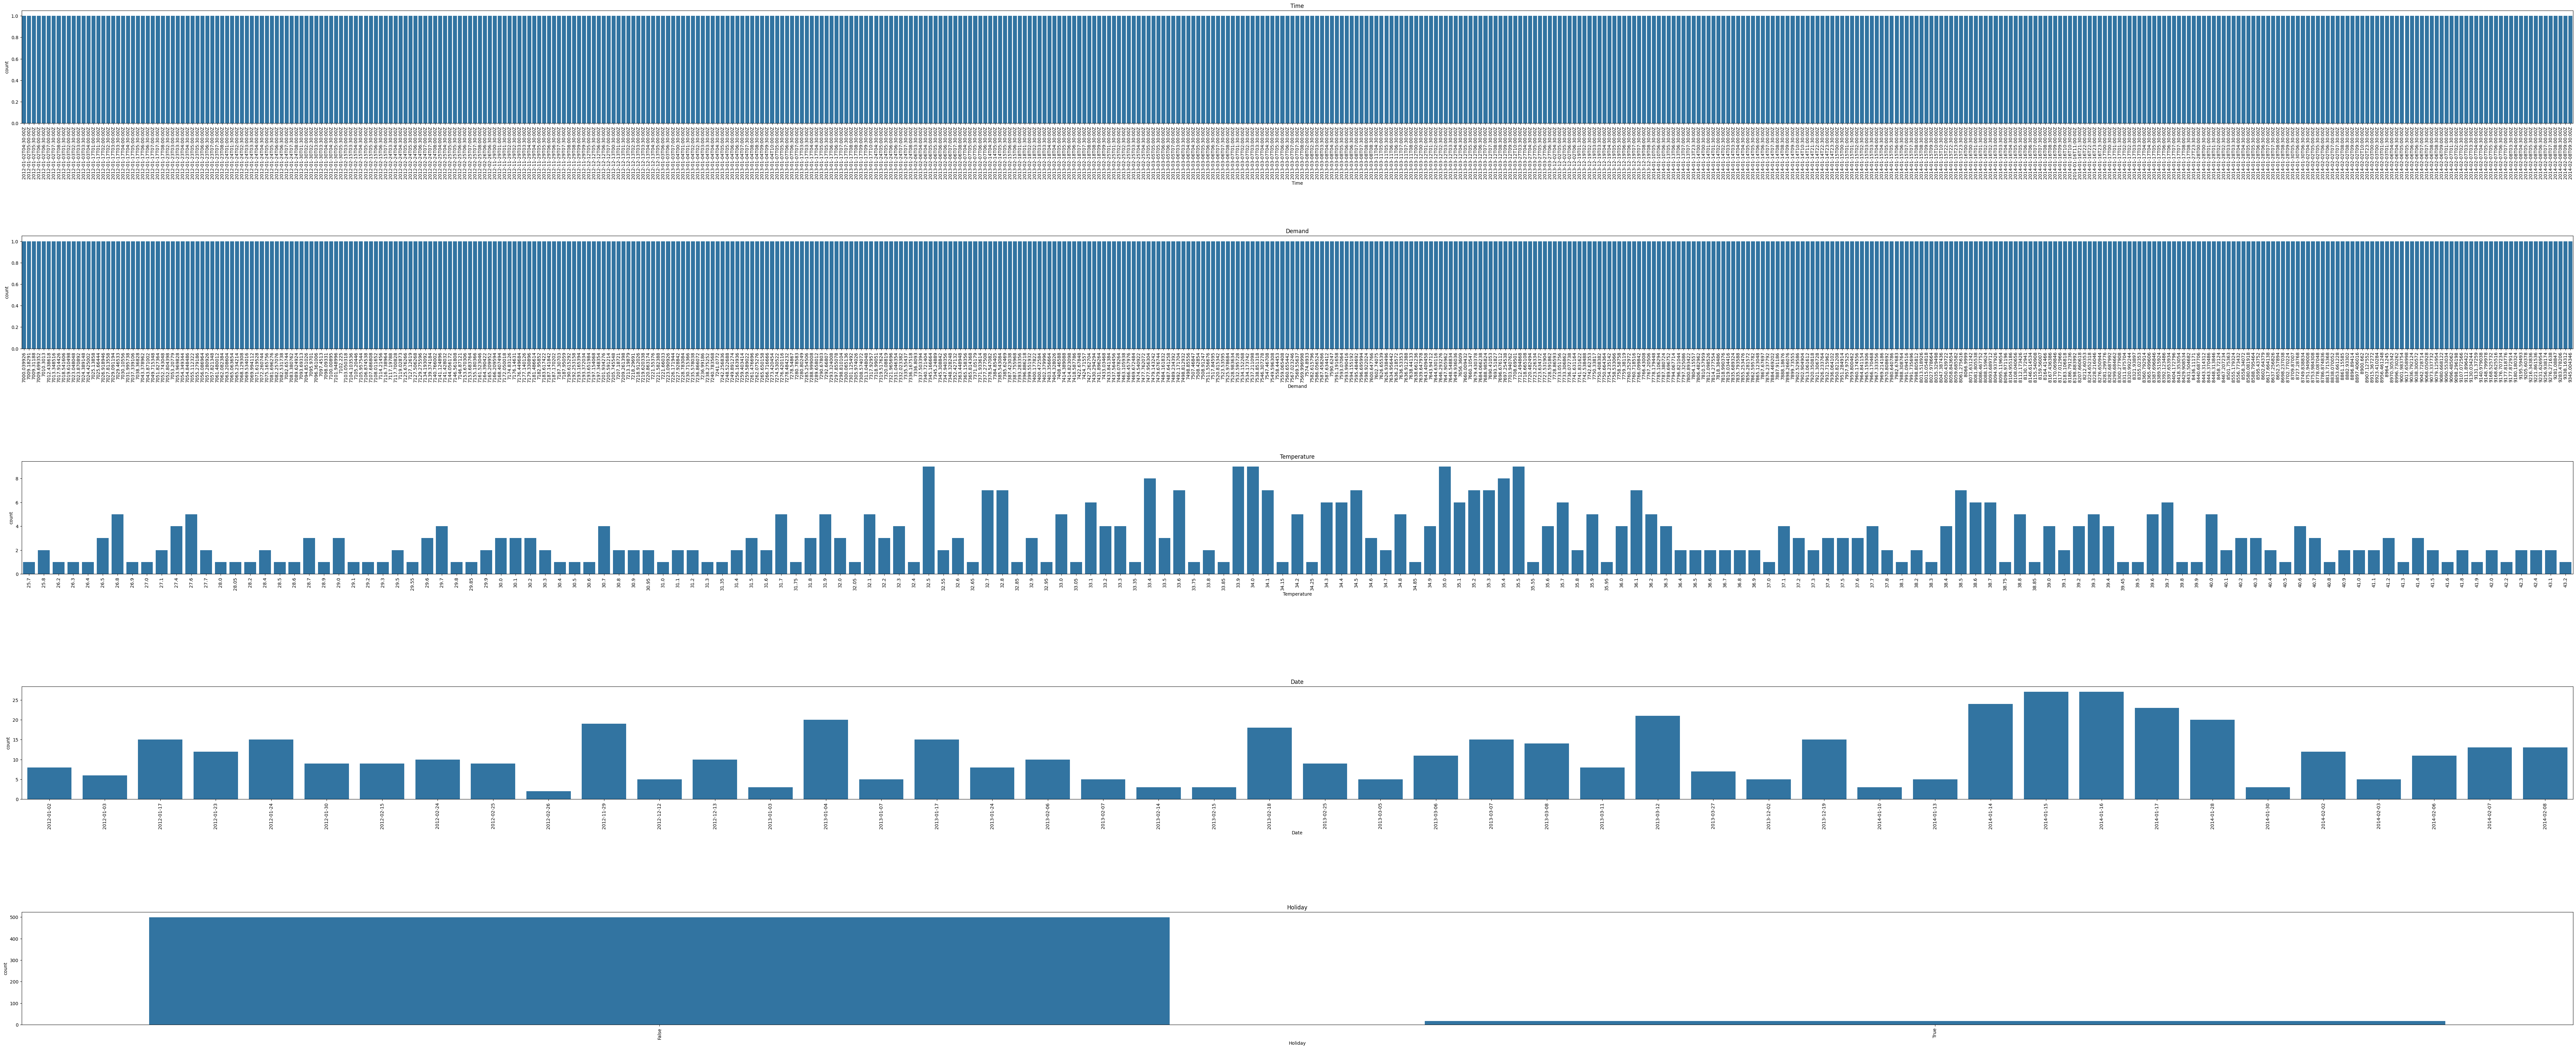

In [11]:
# Graficamos los subnivles de cada variable categorica
columnas_categoricas = ['Time', 'Demand', 'Temperature', 'Date', 'Holiday']

fig, ax = plt.subplots(nrows=5, ncols=1, figsize=(100, 40))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(columnas_categoricas):
    sns.countplot(x=col, data=data, ax=ax[i])
    ax[i].set_title(col)
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=90)

Listo, ya se ha completado la fase de limpieza del set de datos. Originalmente tenia un volumen de 54688 filas y 5 columnas. Y termino con 515 filas y 5 columnas.

El set de datos ya esta listo para el Análisis Exploratorio

In [12]:
#from datetime import datetime
#hoy=datetime.now()
ruta="../results/vic_elec_125256_clean_data.csv"
data.to_csv(ruta, index=False)